In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
training_df = pd.read_csv('data/training_set.csv')
training_metadata_df = pd.read_csv('data/training_set_metadata.csv')

In [10]:
training_metadata_df

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
5,1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0000,0.0000,0.0000,NaN,0.020,65
6,1598,347.846710,-64.760857,318.929827,-49.143596,1,0.1352,0.1820,0.0304,39.7279,0.019,90
7,1632,348.595886,-63.072620,320.023289,-50.713060,1,0.6857,0.7014,0.0100,43.1524,0.021,42
8,1920,149.414062,3.433834,234.919132,42.245550,1,0.3088,0.3229,0.3360,41.1401,0.027,90
9,1926,149.414062,1.940072,236.565366,41.393323,1,0.0000,0.0000,0.0000,NaN,0.018,65


In [46]:
obj_ids = np.unique(training_df.object_id)

/Users/neilbassett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


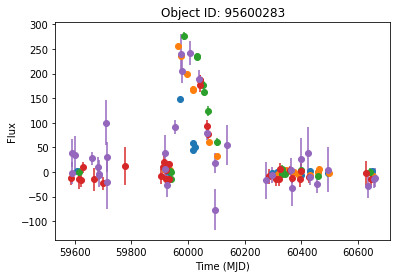

In [52]:
obj_id = np.random.choice(obj_ids)
passband = 1
obj = training_df[training_df.object_id == obj_id]
for passband in np.arange(1, 6):
    plt.errorbar(obj[training_df.passband == passband].mjd, obj[training_df.passband == passband].flux,\
                 yerr=obj[training_df.passband == passband].flux_err, fmt='o')
plt.xlabel('Time (MJD)')
plt.ylabel('Flux')
plt.title('Object ID: %i' % obj_id)
plt.show()

# Random selection baseline

In [57]:
classes = np.unique(training_metadata_df['target'])

In [68]:
pred = np.random.choice(classes, size=len(training_metadata_df))
acc = np.sum(training_metadata_df['target'] == pred)/len(pred)
print('Accuracy = %.4f' % acc)

Accuracy = 0.0761


# Galactic/Extragalactic baseline

In [72]:
galactic_cut = training_metadata_df['hostgal_specz'] == 0
galactic_objs = training_metadata_df[galactic_cut]
extragalactic_objs = training_metadata_df[~galactic_cut]

In [74]:
for target in classes:
    galactic_frac = np.sum(galactic_objs['target'] == target)/np.sum(training_metadata_df['target'] == target)
    extragalactic_frac = np.sum(extragalactic_objs['target'] == target)/np.sum(training_metadata_df['target'] == target)
    print('class = %s' % target)
    print('Galactic fraction = %.4f' % galactic_frac)
    print('Extragalactic fraction = %.4f\n' % extragalactic_frac)

class = 6
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 15
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 16
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 42
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 52
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 53
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 62
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 64
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 65
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 67
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 88
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 90
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000

class = 92
Galactic fraction = 1.0000
Extragalactic fraction = 0.0000

class = 95
Galactic fraction = 0.0000
Extragalactic fraction = 1.0000



In [75]:
galactic_classes = np.array([6, 16, 53, 65, 92])
extragalactic_classes = np.array([15, 42, 52, 62, 64, 67, 88, 90, 95])

In [80]:
galactic_pred = np.random.choice(galactic_classes, size=len(galactic_objs))
extragalactic_pred = np.random.choice(extragalactic_classes, size=len(extragalactic_objs))
acc = (np.sum(galactic_objs['target'] == galactic_pred) + np.sum(extragalactic_objs['target'] == extragalactic_pred))/(len(galactic_pred) + len(extragalactic_pred))
print('Accuracy = %.4f' % acc)

Accuracy = 0.1464
